# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [21]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [11]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [12]:
reg_tip = smf.ols('tip ~ net_bill', data = tips).fit()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [13]:
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = tips).fit()

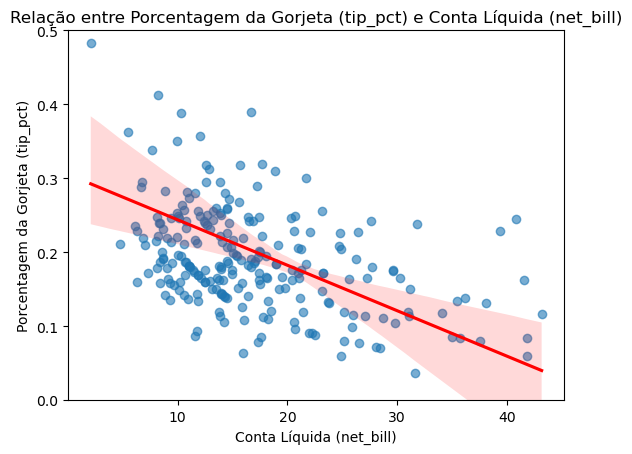

In [14]:
sns.regplot(y='tip_pct', x='net_bill', data=tips, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

# Configurações estéticas
plt.title('Relação entre Porcentagem da Gorjeta (tip_pct) e Conta Líquida (net_bill)')
plt.xlabel('Conta Líquida (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.ylim(0, 0.5)  # Limitando para facilitar visualização
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [15]:
print("R^2 do modelo tip ~ net_bill:", reg_tip.rsquared)
print("R^2 do modelo tip_pct ~ net_bill:", reg_tip_pct.rsquared)

R^2 do modelo tip ~ net_bill: 0.3325407312323707
R^2 do modelo tip_pct ~ net_bill: 0.09129084920662944


Os gráficos mostram que o modelo tip ~ net_bill apresenta uma relação mais forte, com um 
𝑅
2
de 0,3325, indicando que o valor da gorjeta é mais bem explicado pelo valor da conta. Já o modelo tip_pct ~ net_bill tem um 
𝑅
2
de 0,0913, refletindo uma relação mais fraca, pois a porcentagem de gorjeta tende a ser constante, independentemente do valor da conta. Embora ambos os modelos mostrem correlação, não é ideal comparar diretamente os 
𝑅
2
, já que eles lidam com variáveis de escalas diferentes (valor absoluto vs porcentagem).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [25]:
tip_pct_pred = reg_tip_pct.fittedvalues

tip_pred = tip_pct_pred * tips['net_bill']

r2_tip = r2_score(tips['tip'], tip_pred)

r2_tip_pct = reg_pct.rsquared

In [26]:
print("R^2 do modelo para 'tip' predito:", r2_tip)

print("R^2 do modelo 'tip_pct ~ net_bill':", r2_tip_pct)

R^2 do modelo para 'tip' predito: 0.10889974845461381
R^2 do modelo 'tip_pct ~ net_bill': 0.09129084920662944
